In [43]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#loading all of the DESeq2 logFC tables I made earlier.
res_c311y_g288w = pd.read_csv('/Users/Yi/Desktop/Aire C311Y/bulkRNA_files/res_c311y_g288w.csv',index_col = 0)

In [45]:
res_c311y_WT = pd.read_csv('/Users/Yi/Desktop/Aire C311Y/Anderson_Wang_0860/res_C311Y_WT.csv',index_col = 0)

In [46]:
res_GW_WT = pd.read_csv('/Users/Yi/Desktop/Aire C311Y/Anderson_Wang_0860/res_G288W_WT.csv',index_col = 0)

In [47]:
#loading TSA table from Sansom paper
TSA = pd.read_csv('/Users/Yi/Desktop/TSA_Table.csv')

In [48]:
#loading pc rotations from the core's analysis
PCs = pd.read_csv('/Users/Yi/Desktop/Aire C311Y/Anderson_Wang_0860/Analysis/QC/pca_rotations.txt',sep = '\t',index_col = 'Gene')

In [49]:
#loading biomart to translate Ensembl gene IDs to MGI symbols
mart_export = pd.read_csv('/Users/Yi/Desktop/Aire C311Y/Anderson_Wang_0860/mart_export_geneID.csv',sep = ',',index_col = 'Gene stable ID')

In [50]:
#dropping a redundant gene
mart_export_clean = mart_export.drop('ENSMUSG00000115016')

In [51]:
mart_export_clean

,Chromosome/scaffold name,Gene name
Gene stable ID,,
ENSMUSG00000064372,MT,mt-Tp
ENSMUSG00000064371,MT,mt-Tt
ENSMUSG00000064370,MT,mt-Cytb
ENSMUSG00000064369,MT,mt-Te
ENSMUSG00000064368,MT,mt-Nd6
ENSMUSG00000064367,MT,mt-Nd5
ENSMUSG00000064366,MT,mt-Tl2
ENSMUSG00000064365,MT,mt-Ts2
ENSMUSG00000064364,MT,mt-Th


In [52]:
#change index to gene names
res_c311y_WT.index = mart_export_clean['Gene name'][res_c311y_WT.index]

In [53]:
#remove duplicates
res_c311y_WT = res_c311y_WT.loc[~res_c311y_WT.index.duplicated()]

In [54]:
res_c311y_g288w.index = mart_export_clean['Gene name'][res_c311y_g288w.index]

In [55]:
res_c311y_g288w = res_c311y_g288w.loc[~res_c311y_g288w.index.duplicated()]

In [56]:
res_GW_WT.index = mart_export_clean['Gene name'][res_GW_WT.index]

In [57]:
res_GW_WT = res_GW_WT.loc[~res_GW_WT.index.duplicated()]

In [58]:
#find significance (FDR lower than 0.05)
res_c311y_WT_sig = res_c311y_WT[res_c311y_WT['padj'] < 0.05]

In [59]:
res_c311y_g288w_sig = res_c311y_g288w[res_c311y_g288w['padj'] < 0.05]

In [18]:
res_GW_WT_sig = res_GW_WT[res_GW_WT['padj'] < 0.05]

### Plotting PCA from normalized counts (let me know if you don't have the matrix.)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
#we want to scale counts from -1 to 1 to get that nice 'blue/low' and 'red/high' plot.
#we do this for each gene to portray relative highs and lows between samples.

scaler = MinMaxScaler(feature_range=(-1, 1))

In [21]:
#normalized counts from deseq. If you don't have this, I can upload it to box.

normalized_counts = pd.read_csv('/Users/Yi/Desktop/Aire C311Y/bulkRNA_files/normalized_counts.csv',index_col = 0)

In [22]:
#how to reorder the dataframe to change how it appears on plots

normalized_counts_ordered = normalized_counts[['WT_1','WT_2','WT_3','WT_4','C311Y_1','C311Y_2','C311Y_4','G288W_1','G288W_2','G288W_3','G288W_4','KO_1','KO_3']]



In [23]:
#translating ensemble to gene symbol

normalized_counts_ordered.index = mart_export_clean.loc[normalized_counts_ordered.index]['Gene name'].tolist()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
#dropping duplicate names

normalized_counts_ordered = normalized_counts_ordered.loc[~normalized_counts_ordered.index.duplicated()]

In [25]:
#Minmax scale always scales the columns, so we need to transpose our dataframe to scale rows. '.T' quickly finds the transposed version.

minmax_scale = scaler.fit(normalized_counts_ordered.T)

In [26]:
#again, it only scales based on column, so we transpose it again. We then re-transpose so that rows are properly rows again.

X_minmax=minmax_scale.transform(normalized_counts_ordered.T).T

In [27]:
#the scaling function doesn't retain any indices, so we'll need to manually add those back.

X_minmax

array([[-0.2123353 , -0.74690247, -0.57911348, ..., -0.33246057,
         1.        ,  0.84536892],
       [-1.        , -0.97109221, -0.9752673 , ..., -1.        ,
        -1.        , -1.        ],
       [ 0.7594458 , -0.21896671, -0.25466194, ..., -0.77706913,
         0.13905771,  1.        ],
       ...,
       [-0.59390739, -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-0.43551985,  1.        , -1.        , ..., -0.62997741,
        -1.        , -1.        ],
       [ 1.        , -0.37011859,  0.07781775, ..., -1.        ,
        -1.        , -1.        ]])

In [28]:
#everything is still in the same order, so we can just take the row/column indexes from the 'unscaled' version.

scaled_counts = pd.DataFrame(X_minmax,columns = normalized_counts_ordered.columns,index = normalized_counts_ordered.index)

In [29]:
import seaborn as sb

In [30]:
#quick fix for 'C311Y' to 'C313Y'
scaled_counts.columns = scaled_counts.columns.map(lambda x: 'C313Y_' + x[-1] if 'C311Y' in x else x)

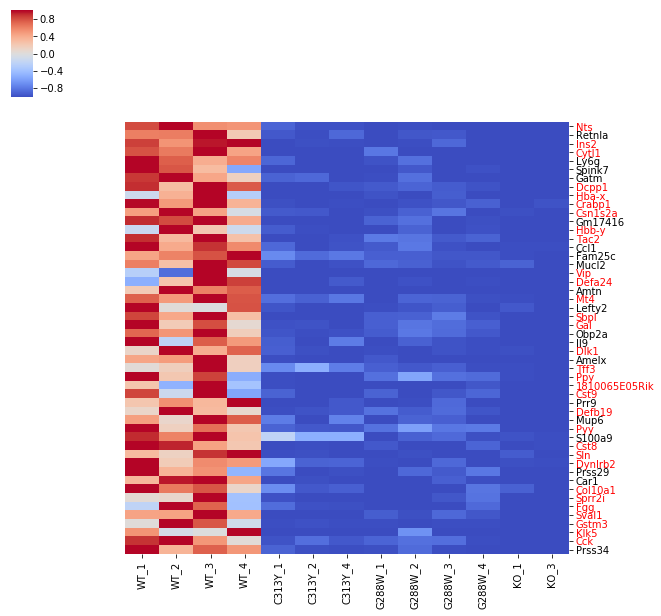

In [31]:
#example of plotting top 50 genes from PC1.

ax = sb.clustermap(scaled_counts.loc[PCs['PC1'].sort_values(ascending = False)[0:50].index.tolist()],col_cluster = False, row_cluster = False,cmap = 'coolwarm',yticklabels = 1)

#this is where we set TSAs as red. You could also label other gene types different colors by adding new if statements.
for i in ax.ax_heatmap.get_yticklabels():
    if i.get_text() in TSA['Gene Symbol'].tolist():
        i.set_color('red')
        
#I got rid of this code, but it allows you to save the figure as a vector file for Illustrator.
#plt.savefig('/Users/nathancramer/Desktop/PC1_highest.svg')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


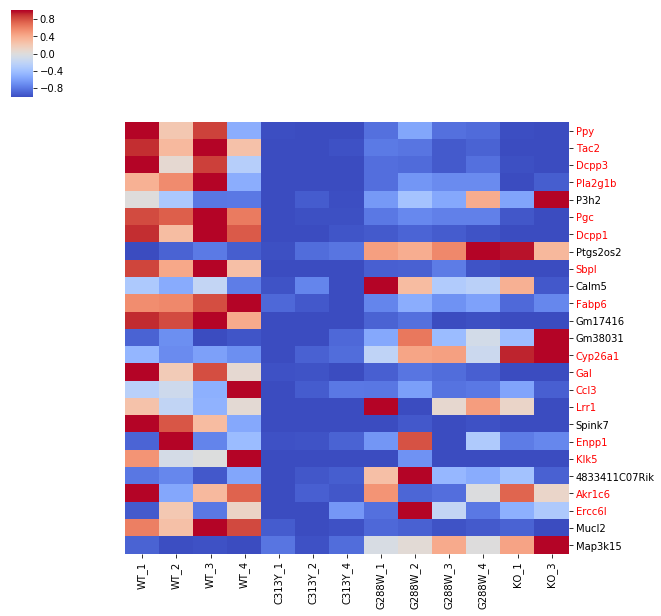

In [32]:
#here, I added an extra gene because one of the PC genes came up as NaN from my analysis. To solve this, I added a .dropna() function

ax = sb.clustermap(scaled_counts.loc[PCs['PC2'].sort_values(ascending = False)[0:26].index.tolist()].dropna(),col_cluster = False, row_cluster = False,cmap = 'coolwarm',yticklabels = 1)

for i in ax.ax_heatmap.get_yticklabels():
    if i.get_text() in TSA['Gene Symbol'].tolist():
        i.set_color('red')



#plt.savefig('/Users/nathancramer/Desktop/PC2_highest.svg')

In [33]:
#you can try plotting your own desired genes by adding and replacing genes in the list called 'gene_list'
#gene_list = ['Aire','Cd80']

#ax = sb.clustermap(gene_list,col_cluster = False, row_cluster = False,cmap = 'coolwarm',yticklabels = 1)

#for i in ax.ax_heatmap.get_yticklabels():
    #if i.get_text() in TSA['Gene Symbol'].tolist():
        #i.set_color('red')

### Plotting the X plot

In [34]:
#our final chosen 'union' of genes to plot
union = list(set(res_c311y_WT_sig.index) | set(res_GW_WT_sig.index))

In [35]:
#a union plus intersection. 'reduction'
reduction = (set(res_c311y_WT_sig.index) | set(res_GW_WT_sig.index)) & set(res_c311y_g288w_sig.index)

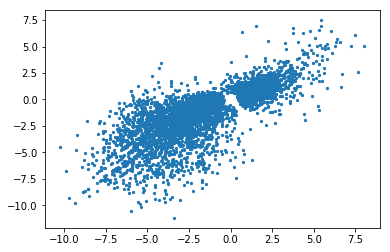

In [36]:
#generic union
plt.scatter(res_GW_WT.loc[union]['log2FoldChange'],res_c311y_WT.loc[union]['log2FoldChange'],s = 5)

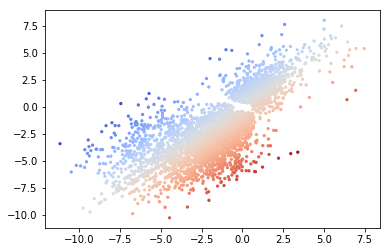

In [37]:
#w/ CY vs GW
plt.scatter(res_c311y_WT.loc[union]['log2FoldChange'],res_GW_WT.loc[union]['log2FoldChange'],s = 5,c = res_c311y_g288w.loc[union]['log2FoldChange'],cmap = 'coolwarm') 

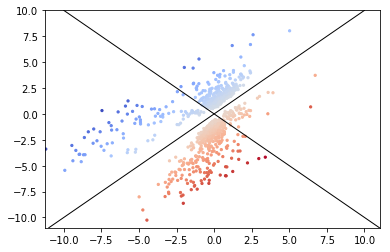

In [38]:
#X plot
#essentially, the first axis is f(x) = y
#the perpendicular axis is f(x) = -y
#I had to force matplotlib to constrain the graph to just the dots
plt.autoscale(tight = True)
plt.plot((10,-11),(10,-11),color = 'black',linewidth = 1)
plt.plot((-10,11),(10,-11),color = 'black',linewidth = 1)
ax = plt.scatter(res_c311y_WT.loc[reduction]['log2FoldChange'],res_GW_WT.loc[reduction]['log2FoldChange'],s = 5,c = res_c311y_g288w.loc[reduction]['log2FoldChange'],cmap = 'coolwarm')

In [39]:
#based on that, we can color according to the new quadrants
axis_colors = []

for i in reduction:
    x = res_c311y_WT.loc[i]['log2FoldChange']
    y = res_GW_WT.loc[i]['log2FoldChange']
    if x > y:
        
        if x > -y:
            axis_colors.append('green')
            
        else:
            axis_colors.append('red')
            
    else:
        #this is inefficient to repeat the same if statement, but it gets the job done.
        if x > -y:
            axis_colors.append('blue')
            
        else:
            axis_colors.append('orange')
            

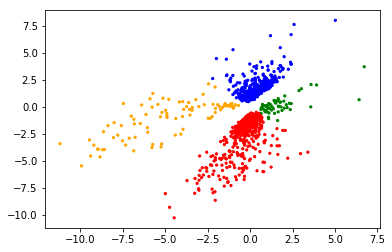

In [40]:
#Colorful 'X'/ Windows plot
plt.scatter(res_c311y_WT.loc[reduction]['log2FoldChange'],res_GW_WT.loc[reduction]['log2FoldChange'],s = 5,c = axis_colors) 

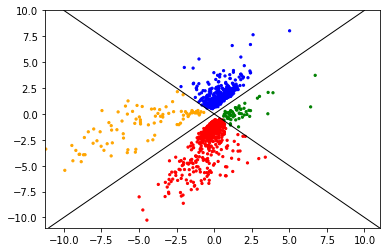

In [41]:
plt.autoscale(tight = True)
plt.plot((10,-11),(10,-11),color = 'black',linewidth = 1)
plt.plot((-10,11),(10,-11),color = 'black',linewidth = 1)
plt.scatter(res_c311y_WT.loc[reduction]['log2FoldChange'],res_GW_WT.loc[reduction]['log2FoldChange'],s = 5,c = axis_colors) 

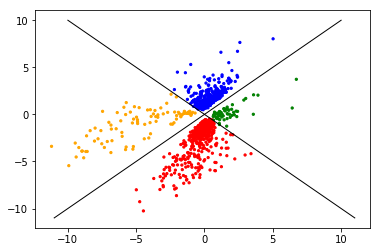

In [42]:
for i in plt.plot():
    if i.get_plot() in TSA['Gene Symbol'].tolist():
        i.set_color('black')
plt.plot((10,-11),(10,-11),color = 'black',linewidth = 1)
plt.plot((-10,11),(10,-11),color = 'black',linewidth = 1)
plt.scatter(res_c311y_WT.loc[reduction]['log2FoldChange'],res_GW_WT.loc[reduction]['log2FoldChange'],s = 5,c = axis_colors) 